In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
from fastbook import *
# !pip install kaggle
# fastbook.setup_book()

     |████████████████████████████████| 727kB 26.2MB/s 
     |████████████████████████████████| 1.2MB 31.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 194kB 38.8MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 


In [ ]:
# !pip install kaggle
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# !mkdir ~/.kaggle
!cd ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
import zipfile

z= zipfile.ZipFile('train.csv.zip')
z.extractall()
z= zipfile.ZipFile('test.csv.zip')
z.extractall()

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
import cv2
trainData=pd.read_csv('train.csv',delimiter=',')

def saveimg():

  for index,row in trainData.iterrows():
    pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join('train', str(row['emotion']) + str(index) + '.jpg')
    cv2.imwrite(pathname,img)
    print('image saved ias {}'.format(pathname))

saveimg()

In [ ]:
# path = Path('train')
# emos = ['Angry','Disgust','Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# def emoLabel(x): return emos[x[0]]
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#     get_y=emoLabel)

# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(1)

In [ ]:

emos = ['Angry','Disgust','Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def emoLabel(x): 
  return str(emos[int(x.name[0])])
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.20, seed=42),
    get_y=emoLabel)


In [ ]:
dls = data.dataloaders(path, bs = 512)

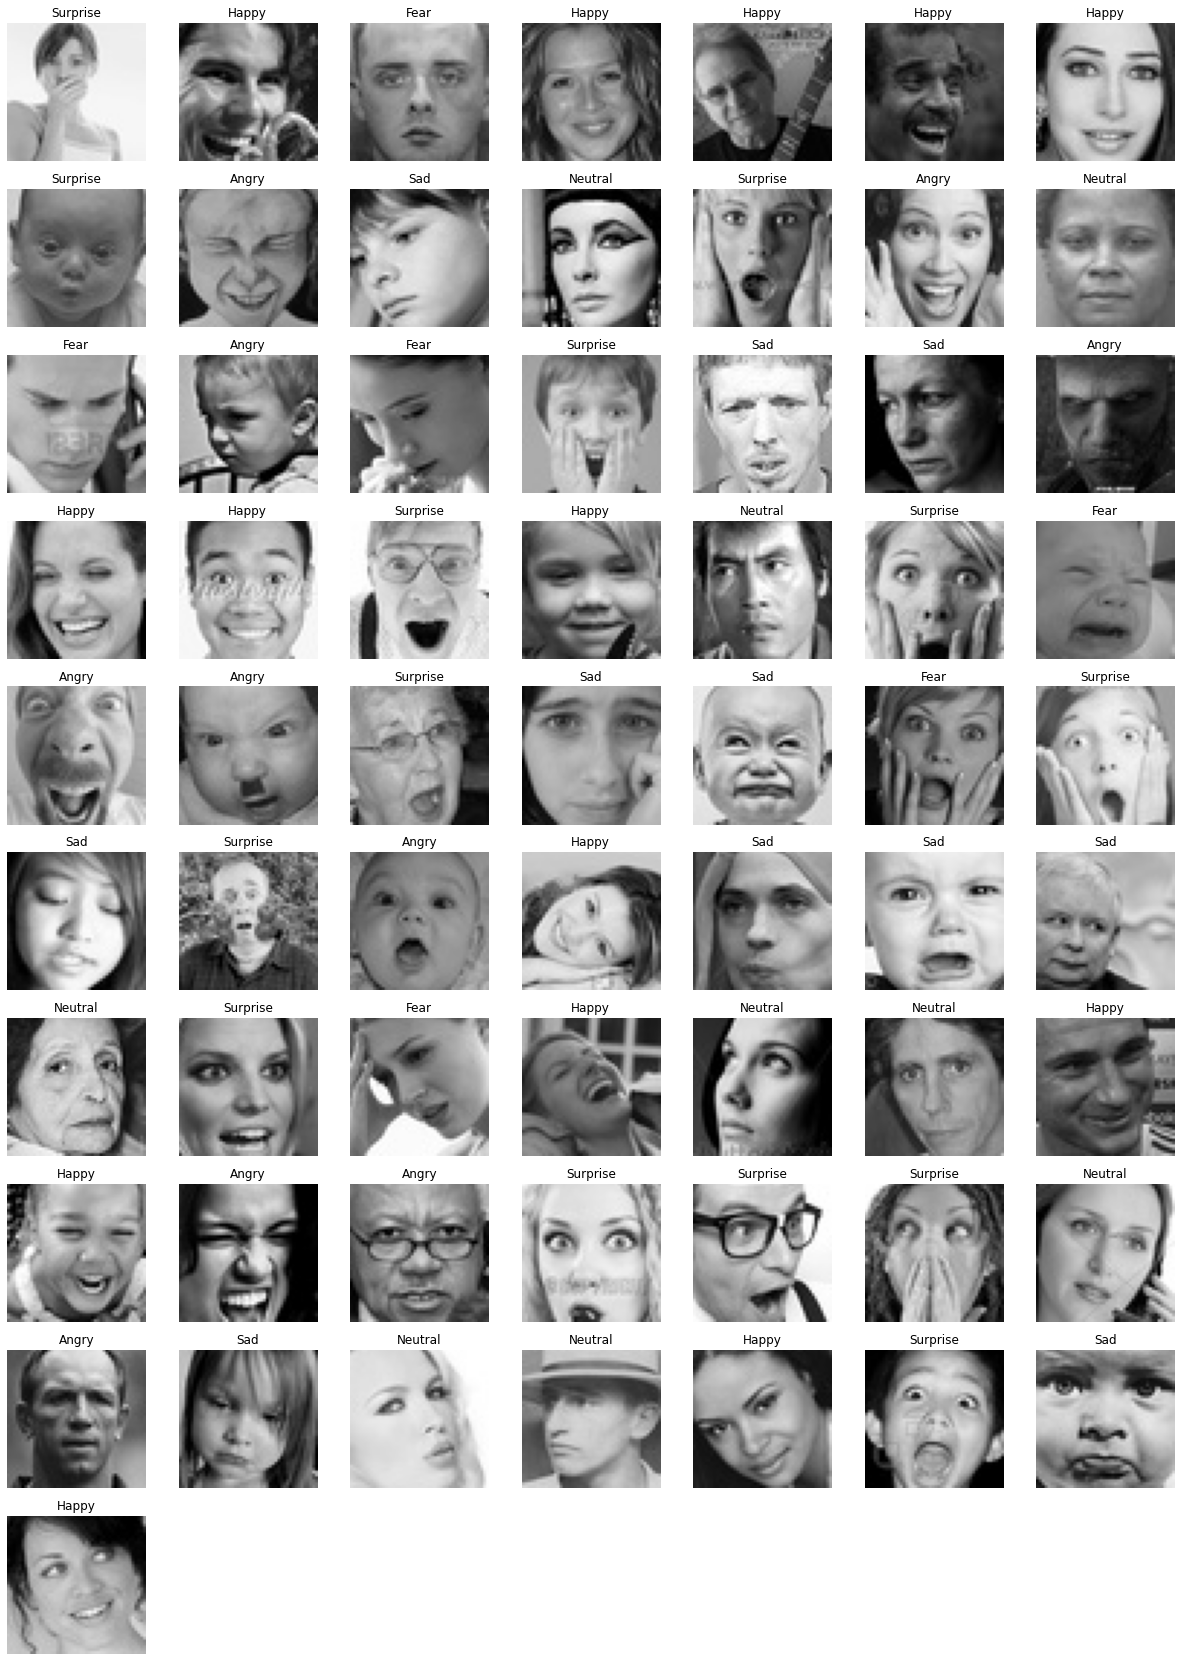

In [ ]:
dls.valid.show_batch(max_n=96, nrows=10)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,error_rate,time
0,2.827586,1.963521,0.671078,00:31
1,2.386289,1.852223,0.618492,00:32
2,1.973593,1.578526,0.576702,00:32
3,1.701148,1.537942,0.561553,00:32
4,1.524238,1.503370,0.544315,00:32
5,1.413225,1.490795,0.542922,00:32
6,1.317882,1.507399,0.538569,00:32
7,1.253161,1.478507,0.535434,00:31
8,1.211114,1.491383,0.534738,00:32


In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.333946,1.701264,0.489900,01:12
1,1.179539,1.443643,0.463083,01:12


In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.736464,1.383881,0.446831,00:58


In [ ]:
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.909663,1.571164,0.462155,00:57


epoch,train_loss,valid_loss,error_rate,time
0,1.024045,1.221959,0.441607,01:05
1,1.028201,1.233293,0.446831,01:05
2,0.852236,1.267059,0.431159,01:05
3,0.521264,1.428876,0.411423,01:05
4,0.238860,1.583399,0.412120,01:05
5,0.079407,1.808073,0.404574,01:05


KeyboardInterrupt: ignored

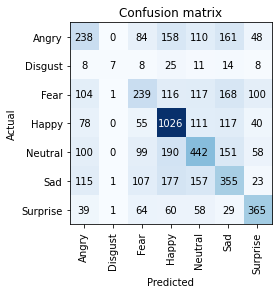

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

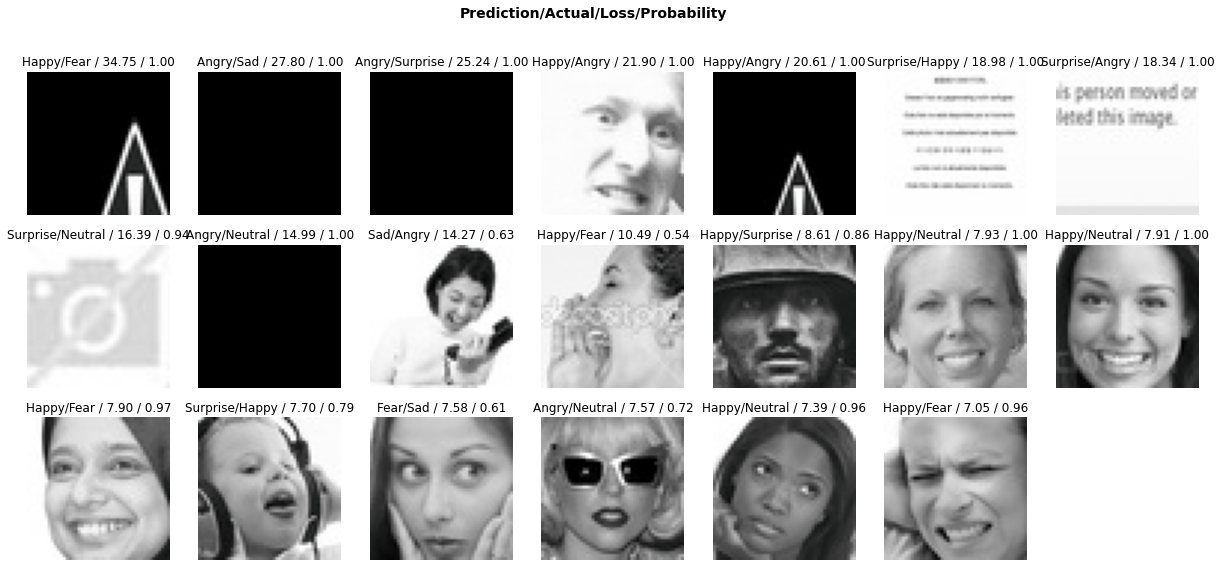

In [ ]:
interp.plot_top_losses(20, nrows=3)

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

epoch,train_loss,valid_loss,error_rate,time


FileNotFoundError: ignored

In [ ]:
fns = get_image_files(path)
fns

(#28716) [Path('train/311007.jpg'),Path('train/616159.jpg'),Path('train/03839.jpg'),Path('train/625545.jpg'),Path('train/620719.jpg'),Path('train/68815.jpg'),Path('train/618651.jpg'),Path('train/028543.jpg'),Path('train/616305.jpg'),Path('train/416725.jpg')...]

In [ ]:
failed = verify_images(fns)

In [ ]:
failed.map(Path.unlink);

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,train in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/train)

FileNotFoundError: ignored

In [ ]:
learn.export()

In [ ]:
path = Path()
learninf = load_learner(path/'export.pkl')
learninf.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,nan,None,None,00:00


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,None,None,00:00
1,nan,None,None,00:00


In [ ]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [ ]:
import numpy
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    img = img.convert('L')
    # img = PILImage.create(img)
    # img=img.reshape((48,48))
    # img = numpy.asarray(img)
    # pathname=os.path.join('train', str(row['emotion']) + str(index) + '.jpg')
    # cv2.imwrite(pathname,img)
    # img = img.resize((48, 48)
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f} All Probabilities: {probs} Catagories: {learn_inf.dls.vocab}'
  


In [ ]:
up =  widgets.FileUpload()
up

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(up.data[0])
img = img.convert('L')
# img = img.resize((48,48))
# img = img.resize((48,48))
# img.to_thumb(80)
# img.shape
img = img.resize((48,48))
img.shape

(48, 48)

In [ ]:
t = np.array(img)
# # t = t.mean(2)
# # t = t[:,:,0]
# t.shape

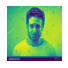

In [ ]:
show_image(t)

In [ ]:
learn_inf.predict(t),learn_inf.dls.vocab

(('Neutral',
  tensor(4),
  tensor([0.0752, 0.0360, 0.0465, 0.2061, 0.4580, 0.1545, 0.0237])),
 ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [ ]:
learn.vocab

AttributeError: ignored

In [ ]:
btn_upload.observe(on_data_change, names=['data'])

In [ ]:
display(VBox([widgets.Label('Select your Face!'), btn_upload, out_pl, lbl_pred]))

AssertionError: ignored